         Unnamed: 0       sweep_1
0                 0 -8.663886e-11
1                 1 -1.113928e-10
2                 2 -1.237698e-10
3                 3 -1.299583e-10
4                 4 -1.237698e-10
...             ...           ...
1239995     1239995 -1.175813e-10
1239996     1239996 -1.113928e-10
1239997     1239997 -1.113928e-10
1239998     1239998 -1.299583e-10
1239999     1239999 -1.113928e-10

[1240000 rows x 2 columns]


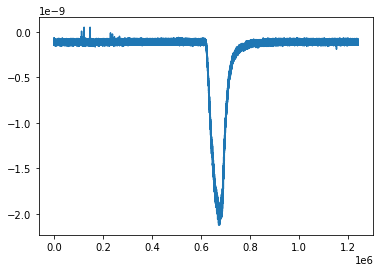

In [8]:
## read in the signal as it comes from the .dat file

import pandas as pd
import matplotlib.pyplot as plt

# big data object
df = pd.read_csv(r'imon_signal_211123_08_Series3.csv')

#small data object
#df = pd.read_csv(r'imon_signal_201229_02_series1.csv')

print(df)

fig = plt.plot(df["sweep_1"].values.tolist())
plt.show()

In [9]:
## create a small testdatabase and register the big dataframe

import duckdb
database = duckdb.connect('test_db.db', read_only=False)
database.execute("Drop table insert_test")
database.register("df_1",df)
database.execute(f'create table insert_test as select * from df_1')
print(database.execute("Show tables").fetchall())

[('df_1',), ('insert_test',)]


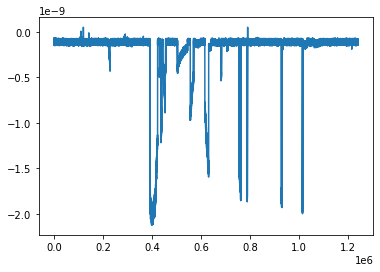

closed


In [10]:
## finally take out the dataframe and plot it

df = database.execute("select * from insert_test").df()
fig = plt.plot(df["sweep_1"].values.tolist())
plt.show()
database.close()
print("closed")

In [20]:
# solution for this problem
import duckdb
database = duckdb.connect('test_db.db', read_only=False)
database.execute("Drop table insert_test_solution")
database.execute("create table insert_test_solution(sweep1 float)")
database.execute(f'insert into insert_test_solution(sweep1) values ({df["sweep_1"].values.tolist()})')

df = database.execute("select * from insert_test_solution").df()
fig = plt.plot(df["sweep_1"].values.tolist())
plt.show()
database.close()


RuntimeError: Conversion Error: Unimplemented type for cast (DOUBLE[] -> FLOAT)

In [19]:
database.close()